In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/grigoriy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

1.5.0


## Использование линейной регресии для классификации

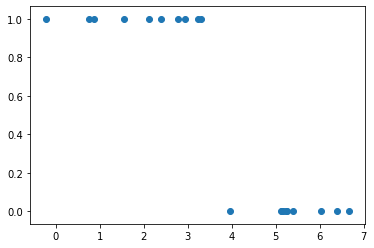

In [14]:
# Синтетический датасет
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)
plt.scatter(xs, labels)
plt.show()

In [17]:
tf.reset_default_graph()

In [18]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder('float')
Y = tf.placeholder('float')

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), #y = w1 * x + w0 
                  tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name = 'parameters')
y_model = model(X, w)

cost = tf.reduce_sum(tf.square(Y - y_model))/len(xs) #MSE
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: xs, Y: labels})
        current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
        if epoch % 100 == 0:
            print(epoch, current_cost)
    w_val = sess.run(w)
    print('Learned parameters:', w_val)

0 0.49521303
100 0.40691748
200 0.37843117
300 0.3522973
400 0.3282949
500 0.30625
600 0.28600302
700 0.2674074
800 0.25032827
900 0.23464198
Learned parameters: [ 0.46520972 -0.03971357]


In [ ]:
# Показать на графиках проблему выбросов 

Линейная регрессия не подходит для задачклассификации, так как слишком чувствительна к выбросам!

## Использование логистической регресии

In [19]:
tf.reset_default_graph()